In [20]:
import IPython.display as display

import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pandas_profiling import ProfileReport
import torch


In [2]:
emotion_categories = ['NEU', 'HAP', 'SAD', 'ANG', 'FEA', 'DIS']

In [3]:
data_dir = "../data/CREMA-D/"

audio_labels = []
audio_arrays = []

for file in os.listdir(data_dir):
    for emotion in emotion_categories:
        if emotion in file:
            audio_labels.append(emotion)
            audio, sr = librosa.load(os.path.join(data_dir, file), sr=16000)
            audio_arrays.append(audio)

Here is an example audio from the dataset belonging to the SAD emotion category

In [6]:
display.Audio(os.path.join(data_dir, file))

In [9]:
df = pd.DataFrame()
df["audio_array"] = audio_arrays
df["label"] = audio_labels

In [10]:
df.head()

,audio_array,label
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ANG
1,"[0.00091552734, 0.0013122559, 0.0015869141, 0....",DIS
2,"[0.008026123, 0.008453369, 0.008361816, 0.0074...",FEA
3,"[-0.004333496, -0.0032653809, -0.0030212402, -...",HAP
4,"[0.0024108887, 0.001373291, 0.0013122559, 0.00...",NEU


In [11]:
df["label"].value_counts()

FEA    1271
HAP    1271
ANG    1271
DIS    1271
SAD    1271
NEU    1087
Name: label, dtype: int64

<AxesSubplot:title={'center':'Distribution of Audio Samples by Emotion Class'}>

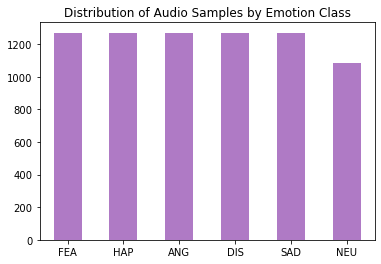

In [18]:
df["label"].value_counts().plot(kind="bar", rot=0, color="#AF7AC5", title="Distribution of Audio Samples by Emotion Class")

The dataset is pretty well-balanced with each class (emotion) having approximately the same number of samples.

In [21]:
profile = ProfileReport(df, title="Profiling Report", explorative=True)

In [22]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]